#**Airplane Customer Segmentation**
by Oki Samila Rici

#**Data Background**

This dataset is about aircraft user data on airlines. Group customers by cluster using the K_Means Clustering method, to analyze how each cluster is different. So that it can be known which customers are loyal and which are not.
And whether discounts facilitated by airlines can affect the frequency with which users choose this airline.


##**Question**
* How many clusters will be formed?
* How to analyze the characteristics of each cluster?
* Does the discount given to have an impact on the customer?




##**Objective**
* Create a model to form clusters to determine the performance of each cluster.
* Analyze each cluster to find the best customers.
* Analyze whether the discount facility provided by the airline has an impact on the number of customers.

##**Expected Outcomes**
* Knowing the number of clusters formed.
* Can analyze the characteristics of each cluster.
* Knowing how effective the discount effect is on customer orders.

##**Data Dictionary**
The dataset has 23 features and 62988 rows
* MEMBER_NO-b : Member ID
* FFP_DATE : frequent flyer program joining date
* FIRST_FLIGHT_DATE : date of the first flight
* Gender: gender
* FFP_TIER : frequent flyer program level
* WORK_CITY : hometown
* WORK_PROVINSE : province of origin
* WORK_COUNTRY : country of origin
* AGE: customer age
* LOAD_TIME : data retrieval date
* FLIGHT_COUNT : number of customer flights
* BP_SUM : itinerary
* SUM_YR_1 : tariff revenue
* SUM_YR_2 : votes price
* SEG_KM_SUM : total distance (km) flights that have been made
* LAST_FLIGHT_DATE : date of last flight
* LAST_TO_END : distance of the last flight time to the most recent last flight order
* AVG_INTERVAL : average time interval
* MAX_INTERVAL : maximum time interval
* EXCHANGE_COUNT : number of exchanges
* avg_discount : the average discount that customers get
* Points_Sum : the number of points earned by the customer
* Point_NotFlight : points not used by members


#**Introducing Libraries and Dataset**

##**Import Library**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

##**Load Dataset**

In [ ]:
data = pd.read_csv('sample_data/flight.csv')
print(data.shape)
data = data.drop('MEMBER_NO', axis=1)
data.head()

(62988, 23)


,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,210,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,140,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,135,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,23,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,152,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


#**Data Understanding**

##**General Information**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FFP_DATE           62988 non-null  object 
 1   FIRST_FLIGHT_DATE  62988 non-null  object 
 2   GENDER             62985 non-null  object 
 3   FFP_TIER           62988 non-null  int64  
 4   WORK_CITY          60719 non-null  object 
 5   WORK_PROVINCE      59740 non-null  object 
 6   WORK_COUNTRY       62962 non-null  object 
 7   AGE                62568 non-null  float64
 8   LOAD_TIME          62988 non-null  object 
 9   FLIGHT_COUNT       62988 non-null  int64  
 10  BP_SUM             62988 non-null  int64  
 11  SUM_YR_1           62437 non-null  float64
 12  SUM_YR_2           62850 non-null  float64
 13  SEG_KM_SUM         62988 non-null  int64  
 14  LAST_FLIGHT_DATE   62988 non-null  object 
 15  LAST_TO_END        62988 non-null  int64  
 16  AVG_INTERVAL       629

This dataset has 23 features, 69288 rows, and no targets. So this modeling belongs to Machine Learning Unsupervised - Clustering.

##**Numeric Data**

In [ ]:
numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
display(data.select_dtypes(include=numerics).columns)
print(data.select_dtypes(include=numerics).shape)
data_num = data.select_dtypes(include=numerics)
data_num.head(3)

Index(['FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2',
       'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
       'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight'],
      dtype='object')

(62988, 14)


,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,6,31.0,210,505308,239560.0,234188.0,580717,1,3.483254,18,34,0.961639,619760,50
1,6,42.0,140,362480,171483.0,167434.0,293678,7,5.194245,17,29,1.252314,415768,33
2,6,40.0,135,351159,163618.0,164982.0,283712,11,5.298507,18,20,1.254676,406361,26


There are 15 numerical features among the 23 features.

##**Category Data**

In [ ]:
display(data.select_dtypes(include=['object']).columns)
print(data.select_dtypes(include=object).shape)
data_cat = data.select_dtypes(include=['object'])
data_cat.head(3)

Index(['FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'WORK_CITY', 'WORK_PROVINCE',
       'WORK_COUNTRY', 'LOAD_TIME', 'LAST_FLIGHT_DATE'],
      dtype='object')

(62988, 8)


,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
0,11/2/2006,12/24/2008,Male,.,beijing,CN,3/31/2014,3/31/2014
1,2/19/2007,8/3/2007,Male,NaN,beijing,CN,3/31/2014,3/25/2014
2,2/1/2007,8/30/2007,Male,.,beijing,CN,3/31/2014,3/21/2014


There are 8 feature categories, including 4 date type features, namely: FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIME, LAST_FLIGHT_DATE.

#**Statistical Summary**

###**Numeric Data**

In [ ]:
data_num.describe()

,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


* min and max value for each column look appropiate.
* based on median value:
  * customer age : 41th
  * number of flights: 7 times
  * cumulative total distance covered: 9994 km

###**Category Data**

In [ ]:
data_cat.describe()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,62988,62988,62985,60719,59740,62962,62988,62988
unique,3068,3406,2,3234,1165,118,1,731
top,1/13/2011,2/16/2013,Male,guangzhou,guangdong,CN,3/31/2014,3/31/2014
freq,184,96,48134,9386,17509,57748,62988,959


Top categorical data is a categorical feature that has the highest frequency of occurrence.
  * Gender : Male 
  * Work City : guangzhou
  * Work Province : guangdong
  * Work Country : CN

Guangzhou and Guangdong are cities and provinces in China, it can be assumed that this flight data comes from one of the airlines in China.

#**Multicollinearity Study**

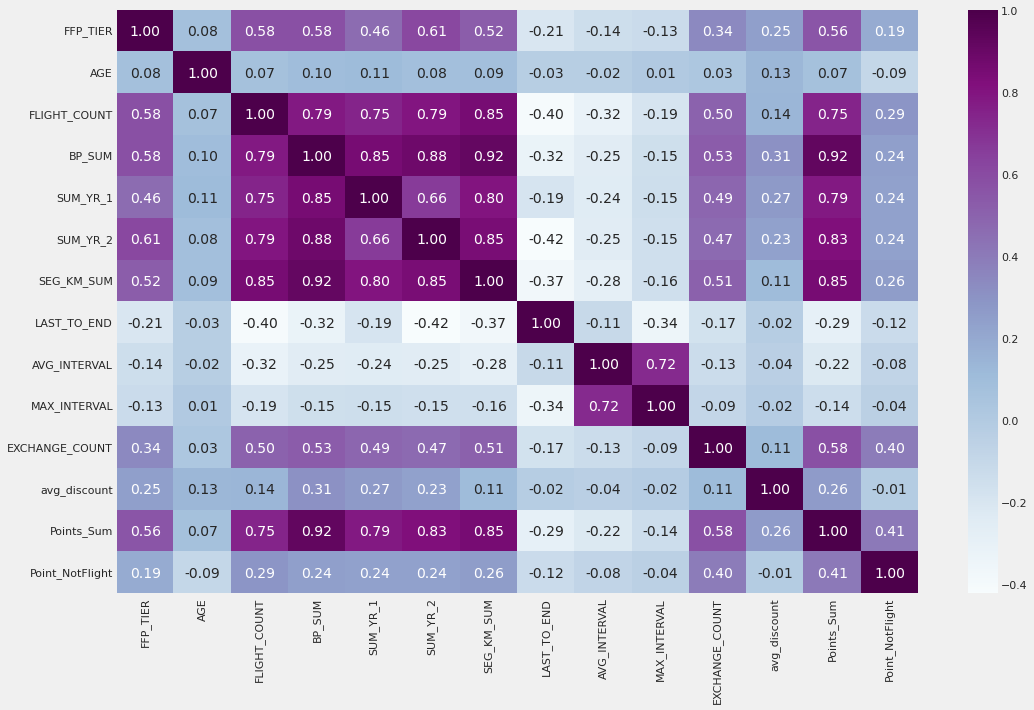

In [ ]:
corr_= data_num.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

Several features are highly correlated with values above the threshold value of 0.80, namely:
  * FLIGHT_COUNT
  *  BP_SUM
  *  SUM_YR_1
  *  SUM_YR_2
  *  SEG_KM_SUM
  *  Points_Sum


#**Data Prepocessing**

##**Missing Value**

In [ ]:
data_missing_value = data.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(data))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]

Six features have missing values and will drop rows because the percentage is less than 30%.

If more than 30% can handle:
* for numeric data, it can be filled with the mean value for data that is normally distributed and if the data is skewed, it can be filled with the median value.
* for categorical data, it can be filled with the value of the mode, which is the value that occurs frequently. or can be filled with a constant value by forming a new column with the name column is others.

However, if the missing value is more than 60% it can drop the column.

The purpose of handling missing values is to make the data easier to analyze and the data to be more accurate as well as the machine learning model is to be made more powerful and without errors.

###**Drop Rows for Missing Value**

In [ ]:
data= data.dropna()

In [ ]:
data.isnull().sum()

FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

##**Feature Selection**

In general, clustering uses RFM. But in this dataset, RFM will be modified to LRFMC.This is done to find out old customers or new customers for L and the use of discounts by customers for C.

L = LOAD_TIME - FFP_DATE (the end time of observation window - the time of membership)
* The number of months between the time of membership and the end of the observation window 


R = LAST_TO_END (the time from the last flight to the end of the observation window)
* The number of months from the last time the customer took the company's aircraft to the end of the observation windows.


F = FLIGHT_COUNT (number of flights in the observation window)
* Number of times the customer takes the company's aircraft in the observation window.


M = SEG_KM_SUM (total flight kilometers of the observation window)
* Accumulated flight history of the customer in observation time.


C = AVG_DISCOUNT (average discount rate)
* Average value of the discount coefficient corresponding to the passenger space during the observation time.



In [ ]:
data = data[data['SUM_YR_1'].notnull()]
data = data[data['SUM_YR_2'].notnull()]
 
 # Only keep records where the fare is non-zero, or the average discount rate is 0 at the same time as the total number of kilometers traveled.
index1 = data['SUM_YR_1'] != 0
index2 = data['SUM_YR_2'] != 0
index3 = (data['SEG_KM_SUM']==0) & (data['avg_discount']==0)
data = data[index1 | index2 | index3]
print(' After deleting the exception record, the shape of the data is ：', data.shape)

 After deleting the exception record, the shape of the data is ： (58015, 22)


In [ ]:
# merge features
data = data[['FFP_DATE','LOAD_TIME', 'FLIGHT_COUNT', 'avg_discount', 'SEG_KM_SUM','LAST_TO_END']]

data['LOAD_TIME'] = pd.to_datetime(data['LOAD_TIME'])
data['FFP_DATE'] = pd.to_datetime(data['FFP_DATE'])
 
data_LRFMC = pd.DataFrame()
data_LRFMC['L'] =((data['LOAD_TIME'] - data['FFP_DATE']).dt.days/30)
data_LRFMC['R'] = data['LAST_TO_END']
data_LRFMC['F'] = data['FLIGHT_COUNT']
data_LRFMC['M'] = data['SEG_KM_SUM']
data_LRFMC['C'] = data['avg_discount']
data_LRFMC.head()

,L,R,F,M,C
0,90.200000,1,210,580717,0.961639
2,87.166667,11,135,283712,1.254676
3,68.233333,97,23,281336,1.090870
4,60.533333,5,152,309928,0.970658
5,74.700000,79,92,294585,0.967692


##**Duplicate Value**

In [ ]:
data_LRFMC.duplicated().sum()

82

This dataset has 82 duplicate data that will be deleted.

###**Drop Rows for Duplicate Data**

In [ ]:
data_LRFMC=data_LRFMC.drop_duplicates()

In [ ]:
data_LRFMC.duplicated().sum()

0

In [ ]:
len(data_LRFMC)

57933

There are 57.933 rows after deleting missing values and duplicate data.

##**Outliers**

In [ ]:
features = list(data_LRFMC)

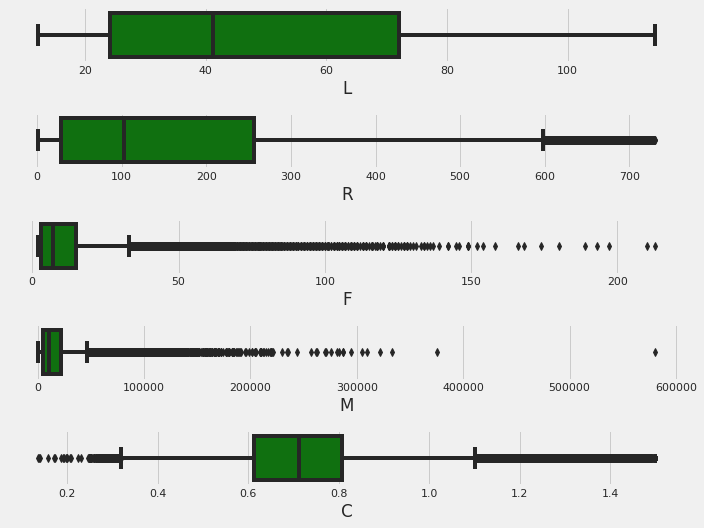

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(0, len(features)):
    plt.subplot(7, 1, i+1)
    sns.boxplot(data_LRFMC[features[i]],orient='h',color='green')
    plt.tight_layout()   


There are many outliers in the RFMC features and only L features are close to the normal distribution. Therefore, a Log Transformation will be carried out so that the RFMC distribution is close to normal and the outliers are reduced without reducing the data.

###**Log Transformation**

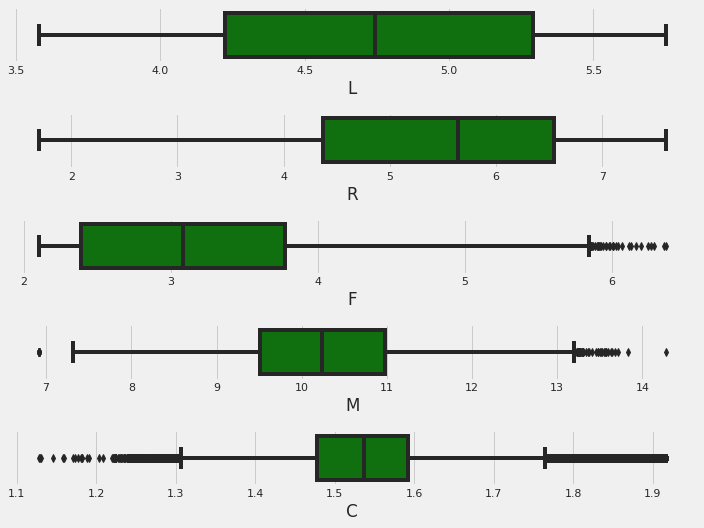

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(0, len(features)):
    plt.subplot(7, 1, i+1)
    sns.boxplot(np.log1p(data_LRFMC[features[i]])+1,orient='h',color='green')
    plt.tight_layout()

In [ ]:
data_LRFMC['L'] = np.log1p(data_LRFMC['L'])
data_LRFMC['R'] = np.log1p(data_LRFMC['R'])
data_LRFMC['F'] = np.log1p(data_LRFMC['F'])
data_LRFMC['M'] = np.log1p(data_LRFMC['M'])
data_LRFMC['C'] = np.log1p(data_LRFMC['C'])

In [ ]:
len(data_LRFMC)

57933

After doing the Log Transformation, it turns out that there are still many outliers in the FMC feature. So that outliers will be removed using the IQR method.

###**Remove Outliers Based on IQR**

In [ ]:
Q1 = data_LRFMC['C'].quantile(0.25)
Q3 = data_LRFMC['C'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((data_LRFMC['C'] >= low_limit) & (data_LRFMC['C'] <= high_limit))
data_LRFMC = data_LRFMC[filtered_entries]

Q1 = data_LRFMC['F'].quantile(0.25)
Q3 = data_LRFMC['F'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((data_LRFMC['F'] >= low_limit) & (data_LRFMC['F'] <= high_limit))
data_LRFMC = data_LRFMC[filtered_entries]

In [ ]:
LRFMC = data_LRFMC

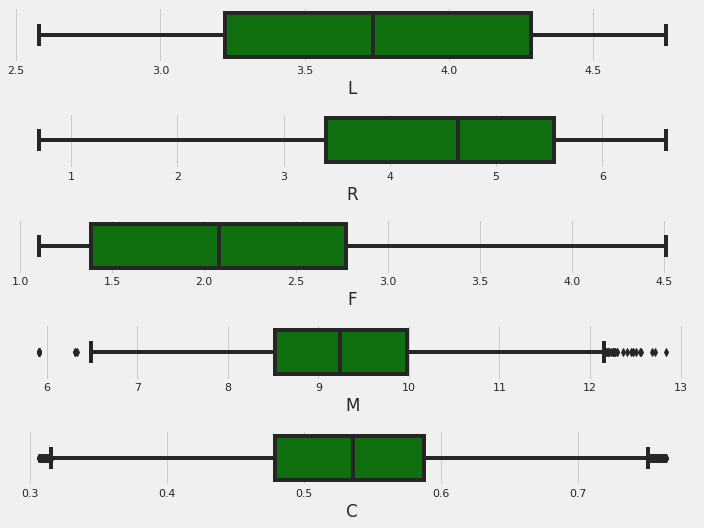

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(0, len(features)):
    plt.subplot(7, 1, i+1)
    sns.boxplot(LRFMC[features[i]],orient='h',color='green')
    plt.tight_layout()   

In [ ]:
len(data_LRFMC)

55159

After removing outliers using the IQR method, outliers were reduced by 2.774.

##**Scaling**

In [ ]:
data_LRFMC_std = StandardScaler().fit_transform(data_LRFMC)
scaled_data_LRFMC = pd.DataFrame(data_LRFMC_std, columns=list(data_LRFMC))
scaled_data_LRFMC.head(3)

,L,R,F,M,C
0,0.839516,0.138300,1.219848,3.307384,2.460742
1,0.278786,-2.057033,2.601830,3.328201,1.701094
2,0.178282,-1.105583,2.442673,3.596113,0.044262


The goal of scaling is to equalize the scale for all values on features. As a result, using the same scale ensures that the learning algorithm treats all features fairly, speeds up the learning algorithm, and makes machine learning models easier to interpret.

The standard scaler is used in this dataset because it is normally distributed by changing the feature values so that the mean = 0 and standard deviation = 1. Meanwhile, normalization is for features that are not normally distributed.

#**Modeling**

##**Find The Best K**

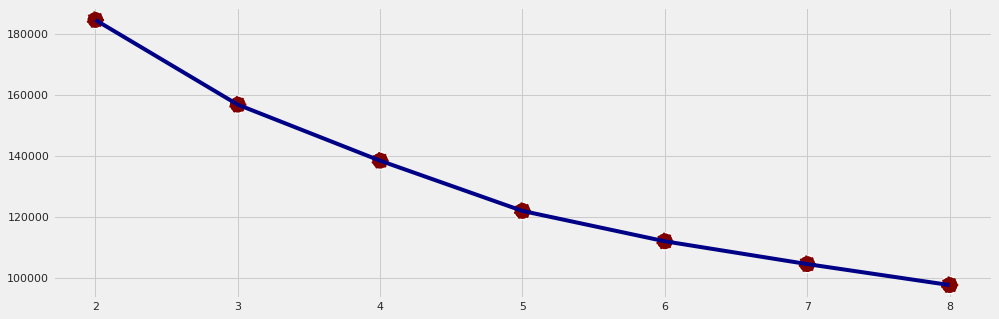

In [ ]:
arr_inertia = []
for i in range(2,9):
    kmeans = KMeans(n_clusters=i, random_state=31).fit(scaled_data_LRFMC)
    arr_inertia.append(kmeans.inertia_) # Sum of squared distances of samples to their closest cluster center.
    
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(x=range(2,9), y=arr_inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,9), y=arr_inertia, s=300, color='#800000',  linestyle='--')


It can be seen that the value of each point in the elbow method
have a similar elbow value, but the value of k=5 has an optimal elbow.

##**Clustering**

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=7).fit(scaled_data_LRFMC)
scaled_data_LRFMC['cluster'] = kmeans.labels_
LRFMC['cluster'] = kmeans.labels_

##**Clustering Visualization**

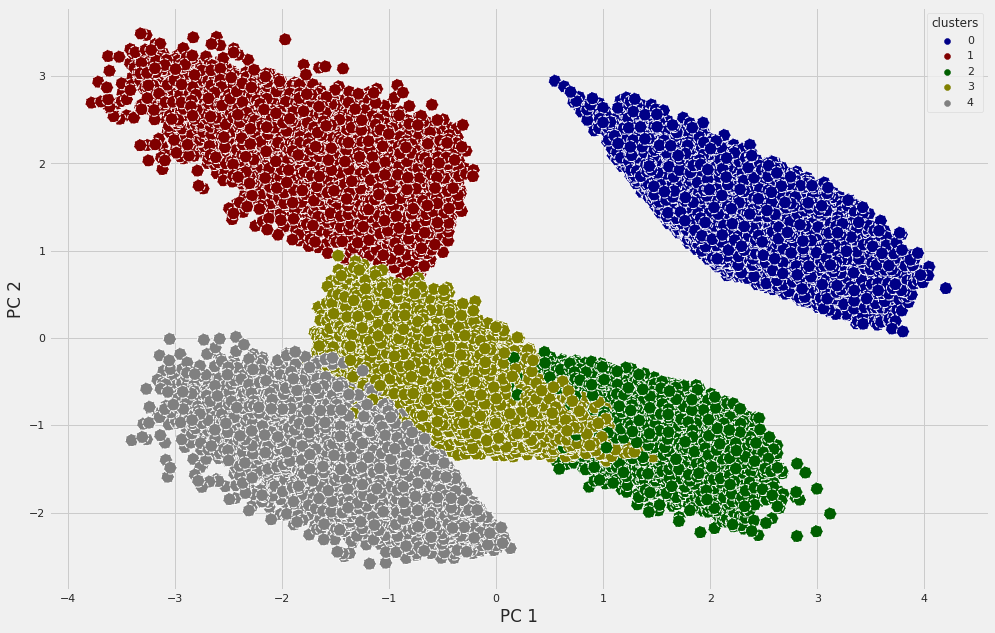

In [ ]:
pca = PCA(n_components=2)

pca.fit(scaled_data_LRFMC)
pcs = pca.transform(scaled_data_LRFMC)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = kmeans.labels_

fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='white',
    linestyle='--',
    data=data_pca,
    palette=['#000087','#800000','#005f00',"#808000",'#808080'],
    s=160,
    ax=ax
)


This is the result of the visualization of 5 clusters, where in general cluster users are formed because there are users who have high or low values on the LRFMC feature.

In [ ]:
LRFMC['L'] = np.expm1(LRFMC['L'])
LRFMC['R'] = np.expm1(LRFMC['R'])
LRFMC['F'] = np.expm1(LRFMC['F'])
LRFMC['M'] = np.expm1(LRFMC['M'])
LRFMC['C'] = np.expm1(LRFMC['C'])

In [ ]:
LRFMC.head()

,L,R,F,M,C,cluster
3,68.233333,97.0,23.0,281336.0,1.090870,1
7,48.400000,3.0,73.0,287230.0,0.962070,1
9,45.500000,15.0,64.0,375074.0,0.708010,1
10,40.966667,22.0,43.0,262013.0,0.988658,1
12,89.500000,67.0,29.0,321529.0,0.799127,1


##**Clustering Distribution**

In [ ]:
cluster_distribution = LRFMC['cluster'].value_counts().reset_index()
cluster_distribution.columns = ['cluster','number of users']
cluster_distribution

,cluster,number of users
0,3,12464
1,4,11447
2,2,11203
3,1,10568
4,0,9477


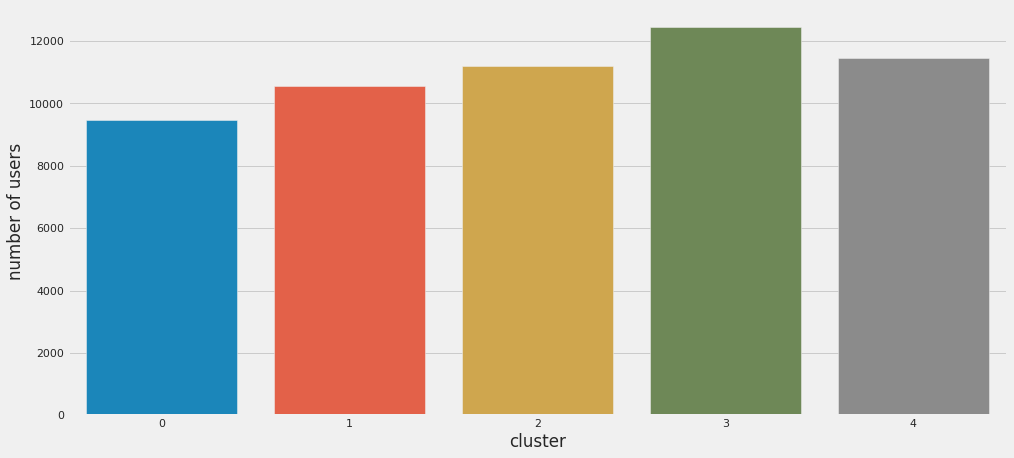

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))

g = sns.barplot(x = 'cluster',y='number of users',data=cluster_distribution,ax=ax)

x = np.arange(len(cluster_distribution['cluster']))
y = cluster_distribution['number of users']


There are 5 clusters:
* Cluster 0 : 9.476 users
* Cluster 1: 10.568 users
* Cluster 2 : 11.203 users
* Cluster 3 : 12.464 users
* Cluster 4: 11.447 users

##**Cluster Characteristics and Analysis**

In [ ]:
median_cluster = LRFMC.groupby('cluster')['L','R','F','M','C'].agg(['median']).reset_index()
median_cluster

,cluster,L,R,F,M,C
,,median,median,median,median,median
0,0,29.400000,238.0,3.0,4807.0,0.535633
1,1,65.866667,15.0,27.0,36940.5,0.733125
2,2,32.600000,299.0,3.0,3924.0,0.824313
3,3,74.433333,112.0,8.0,10799.0,0.697163
4,4,23.400000,56.0,11.0,15935.0,0.705771


Cluster 0 (Customer Group 1) :
Judging from feature L which is relatively low compared to the others, it can be assumed that this is a new user with a fairly frequent number of flights for a new user with a total flight distance that is not far, this can be seen in features F and M. This user has a feature value C which is comparable to the value of the F feature, meaning that this user uses promos quite often.

Cluster 1 (Customer Group 2) :
This cluster has a high value of feature L, so it is assumed that they are long-time users with the highest number of flights among others with the highest total flight distance, which can be seen in features F and M. Users also often use promos for their flights which can be seen on feature C.

Cluster 2 (Customer Group 3) :
This is a new user that can be seen at low scores on feature L with few flights depicted on feature F. The total flight distance is also not far which can be seen on feature M. However, this user has the highest score on feature C among the others. . So, it can be assumed that even though they are new users with few flights, they are very active using the promo.

Cluster 3 (Customer Group 4) :
The cluster that has the highest L feature value, means that it is the oldest user. Even though they are old users, they rarely make flights that can be seen in feature F. However, the value on feature M is quite high, so it is assumed that the total flight distance is long and they are also actively using promos that can be seen in feature C.

Cluster 4 (Customer Group 5) : 
This group has the lowest value of feature L which can be assumed as the latest user with a high number of flights for the latest user size that can be seen in feature F. The total flight distance is also high which can be seen in feature M and the value on feature C is also high, it is assumed that This user is active in using the promo.


#**Insight and Recommendation**

##**Insight**

There are 5 clusters:
* Cluster 0 : 9.476 users
* Cluster 1: 10.568 users
* Cluster 2 : 11.203 users
* Cluster 3: 12.464 users
* Cluster 4: 11.447 users

Of the five clusters, the highest number of clusters is in cluster 3 with 12.464 users. Where they are the oldest users who rarely fly, but are active in using discounts.

The best clusters are clusters 1 and 4. Where cluster 1 is the old user who often makes flights and also often uses discounts. Cluster 4 is the newest user who makes frequent flights and also really takes advantage of the discount facility for flights.

##**Recommendation**

After analyzing the 5 clusters, it can be seen that each cluster is active in using discounts. So it can be concluded that the discount facilities provided by airlines are effective for customers. The airline can maintain or increase the discount facility that can be an option for customers to choose this airline. In addition to discount facilities, airlines can provide other facilities that can attract customers to choose this airline.